In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [86]:
df = pd.read_csv('tips (data for regression problem).csv')

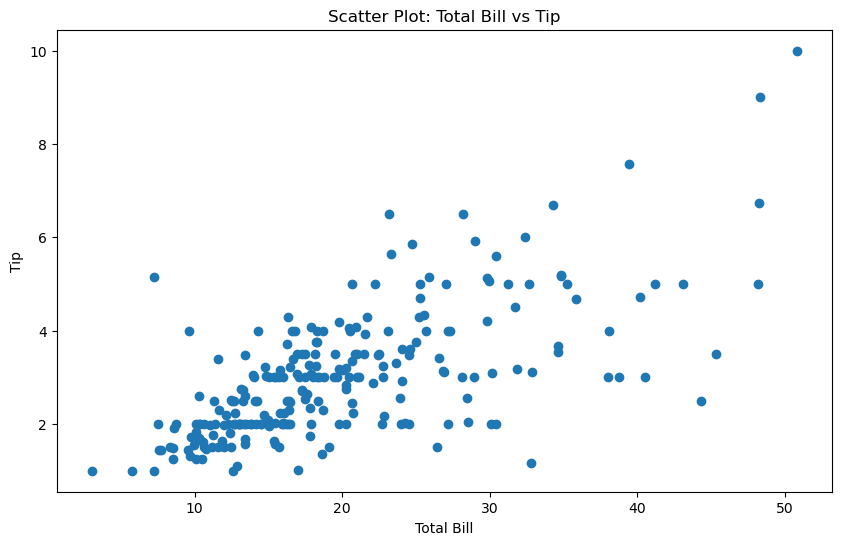

In [87]:
# 1. Data Analysis and Visualization
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

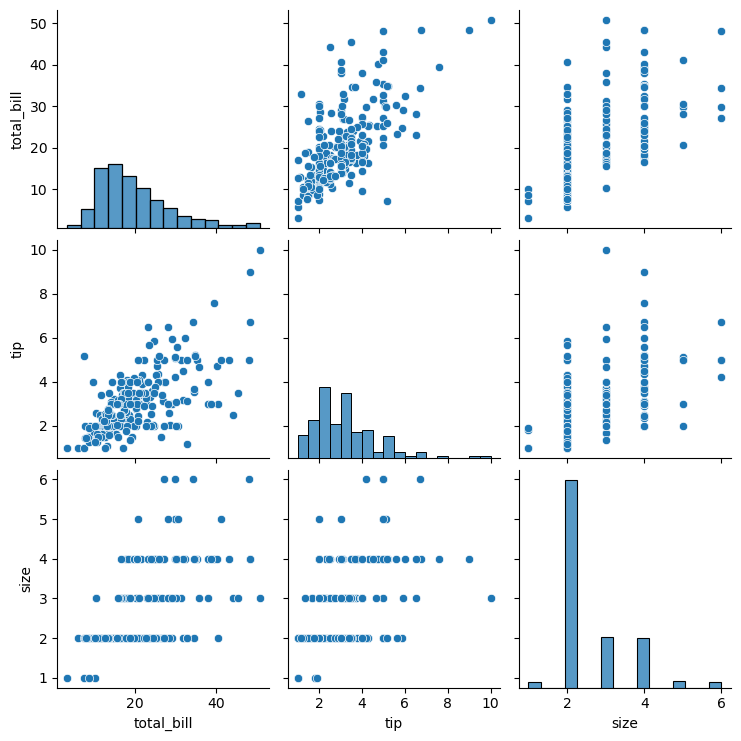

In [88]:
# Pair Plot
sns.pairplot(df[['total_bill', 'tip', 'size']])
plt.show()

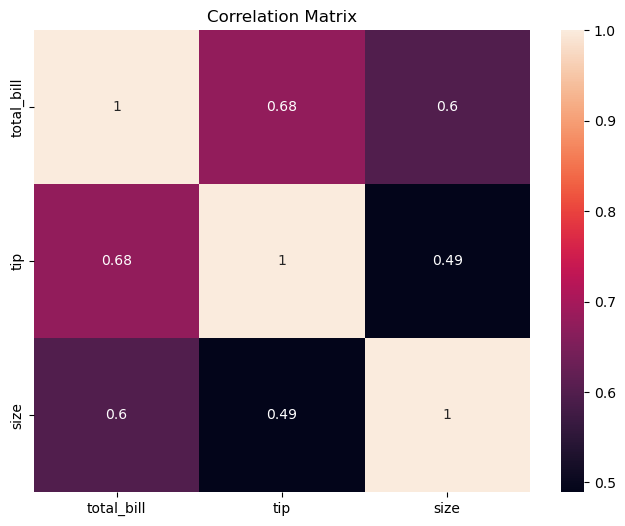

In [89]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [90]:
# 1. Rainbow Test for Linearity
def perform_rainbow_test(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    return rainbow_statistic, rainbow_p_value

In [91]:
# 2. Residuals Plot
def plot_residuals(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.show()

In [92]:
# 3. Line Plot (Time Series)
def plot_time_series(df):
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(df)), df['tip'], marker='o')
    plt.xlabel('Observation Number')
    plt.ylabel('Tip Amount')
    plt.title('Time Series Plot of Tips')
    plt.show()

In [93]:
# Preparing data for modeling
# Converting categorical variables to dummy variables
X = pd.get_dummies(df.drop('tip', axis=1)).astype(float)
y = df['tip']

# Performing Rainbow Test
rainbow_stat, rainbow_p = perform_rainbow_test(X, y)
print("\nRainbow Test Results:")
print(f"Statistic: {rainbow_stat:.4f}")
print(f"P-value: {rainbow_p:.4f}")
print("Null hypothesis (linearity) is", "rejected" if rainbow_p < 0.05 else "not rejected")


Rainbow Test Results:
Statistic: 1.1971
P-value: 0.1659
Null hypothesis (linearity) is not rejected


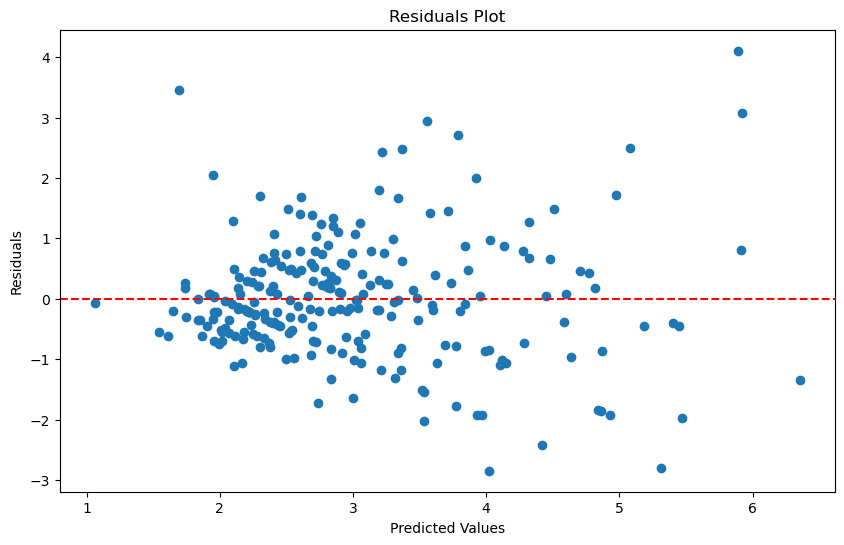

In [94]:
plot_residuals(X, y)

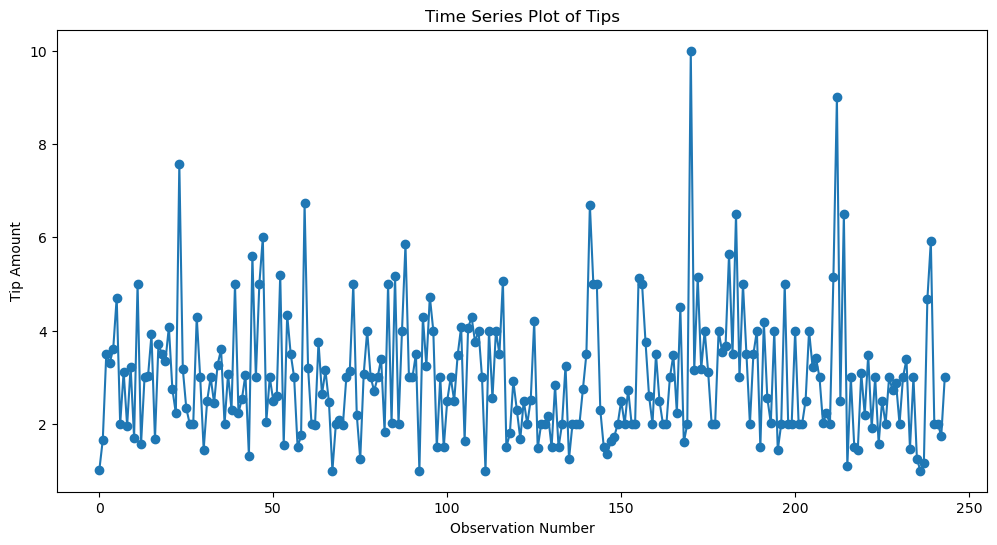

In [95]:
plot_time_series(df)

In [96]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Initializing models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

In [99]:
# Training and evaluating models
results = {}
for name, model in models.items():
    # Training model
    model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae}

In [100]:
# Printing results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R2 Score: {metrics['R2']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")


Linear Regression:
MSE: 0.7034
R2 Score: 0.4373
MAE: 0.6671

Ridge Regression:
MSE: 0.7023
R2 Score: 0.4381
MAE: 0.6671

Lasso Regression:
MSE: 1.4487
R2 Score: -0.1590
MAE: 1.0471

Decision Tree:
MSE: 1.3919
R2 Score: -0.1135
MAE: 0.8776

Random Forest:
MSE: 0.9358
R2 Score: 0.2514
MAE: 0.7688

SVR:
MSE: 0.7978
R2 Score: 0.3618
MAE: 0.6959

KNN:
MSE: 0.9341
R2 Score: 0.2527
MAE: 0.7811


In [101]:
# Feature Importance (using Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

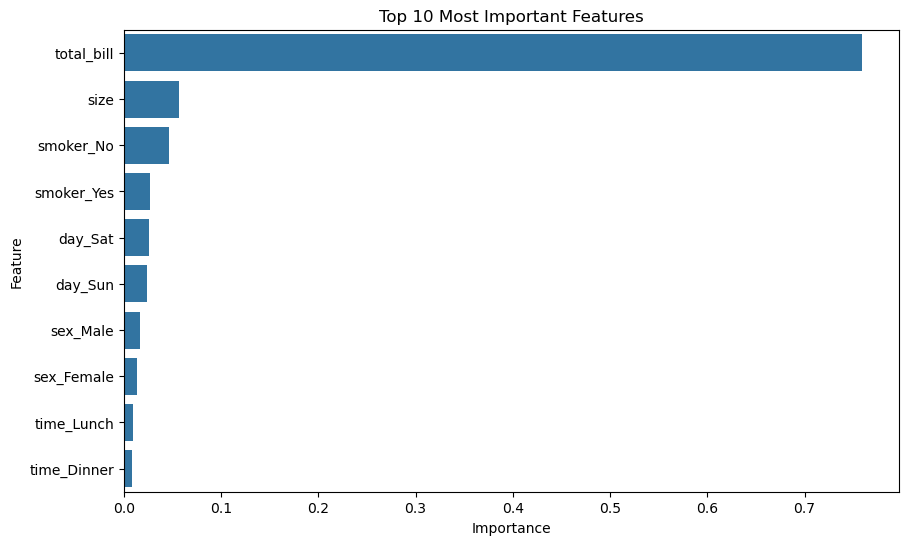

In [102]:
# Ploting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features')
plt.show()

<p>Significant Factors Impacting Tip Amounts:
Total bill amount shows the strongest correlation with tip amount
Party size (number of people) has a moderate positive correlation
Time of day (dinner vs lunch) affects tipping behavior
Day of the week shows some influence on tipping patterns</p>

<h1>Management Insights:</h1>

<p>Focus on larger party sizes as they tend to leave higher tips
Dinner service typically generates higher tips than lunch,
Weekend service may yield better tips than weekdays,
Server allocation can be optimized based on peak tipping times,
Consider promotional strategies during low-tipping periods,Train staff on factors that influence tipping behavior,
Optimize table assignments based on party size,
Consider special promotions during typically lower-tipping periods,
Monitor and adjust service levels during peak tipping times,
Use the predictive model to forecast staff earnings and optimize scheduling</p>